# Testing the Effectiveness of Applying PCA

Dataset taken from a popular Credit Card Fraud Detection dataset on Kaggle. Note: The following data is a subset of the original dataset found on Kaggle. The original dataset is quite large, and I found it easier to work with the given subset instead.  

You can download this subset of the dataset from this link on my google drive:    

https://drive.google.com/file/d/1tNzitLpSeC98kLpNwaFhoT3YqJBnaqHp/view?usp=sharing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("TRAIN.csv",index_col=0)

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,,,,,,,,,,,,,,,,,,,,,
0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,...,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,...,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,...,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,...,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,...,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


The data has 29 Attributes (Features) and one Class (To predict). 0 Stands for legitimate transaction, and 1 stands for fraudulant transaction.

The columns V1-V28 have no description (No name or context given with the dataset). The Amount column indicates the amount withdrawn in the given transation.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284455 entries, 0 to 284454
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284455 non-null  float64
 1   V2      284455 non-null  float64
 2   V3      284455 non-null  float64
 3   V4      284455 non-null  float64
 4   V5      284455 non-null  float64
 5   V6      284455 non-null  float64
 6   V7      284455 non-null  float64
 7   V8      284455 non-null  float64
 8   V9      284455 non-null  float64
 9   V10     284455 non-null  float64
 10  V11     284455 non-null  float64
 11  V12     284455 non-null  float64
 12  V13     284455 non-null  float64
 13  V14     284455 non-null  float64
 14  V15     284455 non-null  float64
 15  V16     284455 non-null  float64
 16  V17     284455 non-null  float64
 17  V18     284455 non-null  float64
 18  V19     284455 non-null  float64
 19  V20     284455 non-null  float64
 20  V21     284455 non-null  float64
 21  V22     28

In [5]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in any column! Great :)

In [6]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,...,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000
mean,0.000779,-0.000811,0.001275,-0.000793,0.000592,0.000186,0.000951,-0.000270,0.000505,0.000948,...,-0.000171,-0.000050,0.000027,0.000018,-0.000051,0.000028,-0.000037,-0.000028,88.359646,0.001547
std,1.956147,1.650234,1.510626,1.414216,1.378329,1.332161,1.232971,1.190897,1.097805,1.085083,...,0.732765,0.725495,0.624473,0.605645,0.521274,0.482243,0.403488,0.330127,250.177771,0.039299
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.920117,-0.598750,-0.889749,-0.848835,-0.691343,-0.768227,-0.553788,-0.208633,-0.642669,-0.535273,...,-0.228434,-0.542432,-0.161861,-0.354545,-0.317194,-0.326951,-0.070845,-0.052957,5.600000,0.000000
50%,0.018330,0.065238,0.179953,-0.020206,-0.054243,-0.274172,0.040265,0.022328,-0.051183,-0.092820,...,-0.029520,0.006675,-0.011192,0.040977,0.016461,-0.052077,0.001337,0.011238,22.000000,0.000000
75%,1.315693,0.803357,1.027332,0.742635,0.612015,0.398641,0.570515,0.327214,0.597346,0.454005,...,0.186326,0.528481,0.147659,0.439527,0.350697,0.240929,0.091023,0.078271,77.200000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Let us explore our data:

Note: a pairplot would not be suitable for 30 columns, as it would be very small, and would be too much information displayed at once.

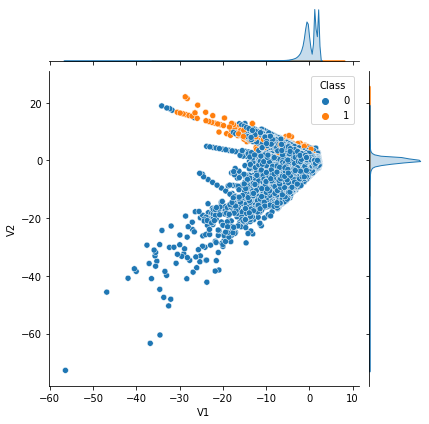

In [7]:
sns.jointplot(x='V1',y='V2',data=data,hue='Class')

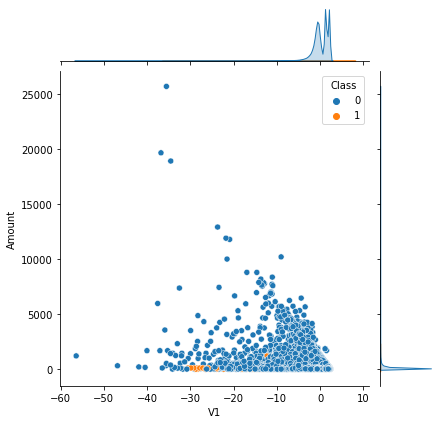

In [8]:
sns.jointplot(x='V1',y='Amount',data=data,hue='Class')

C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


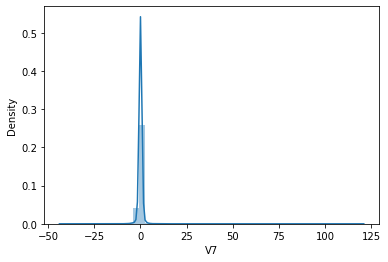

In [9]:
sns.distplot(data['V7'])

C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


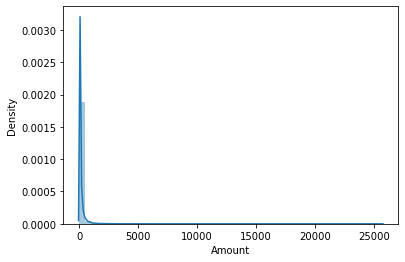

In [10]:
sns.distplot(data['Amount'])

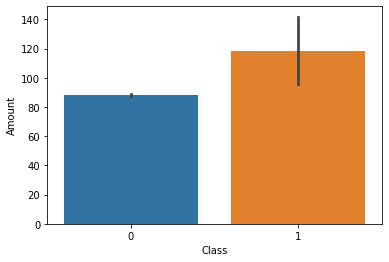

In [11]:
sns.barplot(x='Class', y='Amount', data=data)

The fraudulant transactions (Class 1) tend to use higher amounts, and have large outliers. This could be useful for classification. More below...

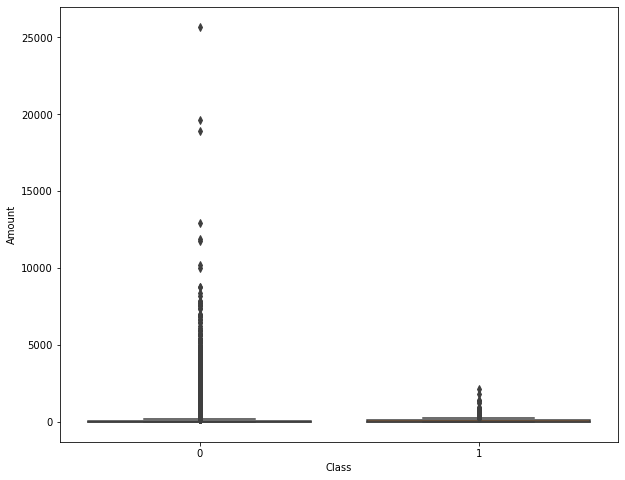

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Class',y='Amount', data=data)

Clearly, there are large outliers in both classes that are causing this large skewed shape of the boxplots!    
We will remove these outliers below.

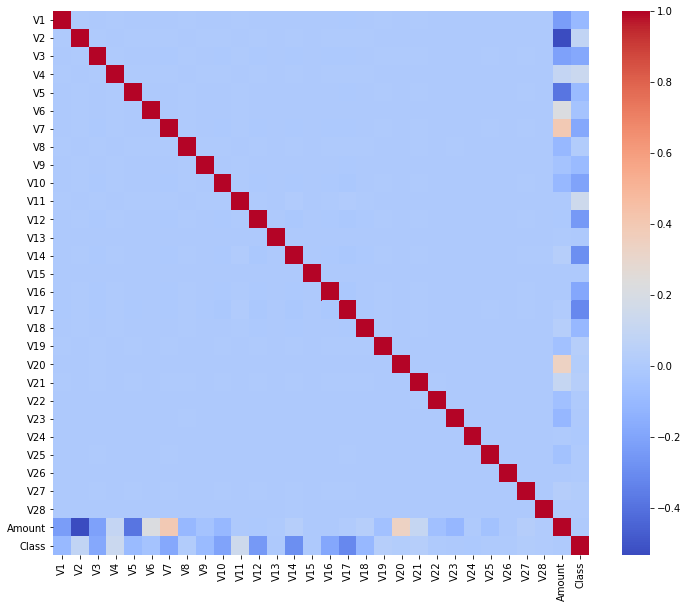

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm')

## Observations:

We notice almost all the columns have large outliers which must be dealt with. However, we can notice from the jointplots above that some of these outliers are actually of class 1 (Which we want to detect!). Hence maybe we should keep atleast these outliers that have a favourable output. 

Next, we notice from the heatmap, that alot of columns have poor correlation with eachother, except for the amount column that has slightly more correlation with some other columns.

 We now explore some information about the number of samples for each class:

In [14]:
(data['Class']==1).sum()

440

In [15]:
(data['Class']==0).sum()

284015

We can clearly see that we have inbalanced data. To balance the data, I will use the SMOTE method which creates new data by interpolating existing data. 
Note: This has not been covered in class, but I am doing this so that our data looks more like the data employed in the examples in class where the number of data points for either class were almost equal

## Removal of outliers
I only remove the outliers that are NOT class 1, since we have very few class 1 records.
This removal of outliers will lead to loss of certain data, but will also preserve some important data.

In [16]:
y=data['Class']
data=data.drop('Class',axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Index,,,,,,,,,,,,,,,,,,,,,
0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,...,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75
1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,...,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38
2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,...,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95
3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,...,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04
4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,...,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284450,1.216221,0.095995,0.666817,1.850616,-0.516269,-0.267296,-0.183114,-0.104976,-1.985790,1.442988,...,-0.528517,-0.286826,-0.347838,0.072935,0.367923,0.358108,0.044019,0.027223,0.028017,19.46
284451,1.429502,-0.990271,-0.224429,-1.808740,0.770788,3.730989,-1.914212,1.036385,-0.316971,0.646103,...,0.206332,0.376136,0.928723,-0.108174,1.048922,0.481214,-0.026342,0.062900,0.024639,0.02
284452,2.041198,-0.218276,-1.405547,0.187570,0.001916,-0.781668,-0.043787,-0.090115,0.677407,0.227002,...,-0.348353,0.273900,0.844092,-0.023770,-0.407890,0.190140,-0.089576,-0.029237,-0.075626,1.00


In [17]:
import scipy.stats as stats
normalized=data.apply(stats.zscore)
normalized

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Index,,,,,,,,,,,,,,,,,,,,,
0,1.147419,-0.703022,-1.302745,-1.010736,-0.440997,-1.132659,-0.061125,-0.549860,-1.795082,1.480383,...,-0.378757,0.014549,0.719185,-0.104085,0.080627,0.735394,0.215538,-0.117261,-0.196205,-0.054400
1,0.653239,0.062649,0.338141,0.003340,-0.525322,-1.001601,0.023526,-0.248825,0.116245,-0.194284,...,-0.051857,-0.110948,-0.251492,0.126441,1.304356,0.421745,1.945768,-0.195009,0.024676,-0.347672
2,0.749269,0.016300,-0.331369,-0.476292,-0.105545,-0.884475,0.046342,-0.352571,-1.238980,0.192890,...,0.269338,-0.319224,-0.979323,-0.002033,-0.288505,1.023973,-0.943111,0.003869,0.093790,-0.309419
3,-0.471804,-0.224676,1.410505,-0.563001,0.234765,-0.872412,0.224059,-0.209352,-0.707006,-0.057788,...,-0.597905,-0.412797,-0.340249,-0.073297,1.117970,0.031000,-1.522573,-0.085364,-0.196163,-0.321051
4,-0.596737,0.155281,1.394913,0.096033,-0.053377,0.683579,0.612317,0.298765,-0.385611,-0.777614,...,0.458297,0.186474,0.024185,0.193748,1.050532,0.945749,-1.555795,0.072272,0.276653,0.346316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284450,0.621346,0.058662,0.440574,1.309144,-0.374991,-0.200788,-0.149286,-0.087922,-1.809337,1.328969,...,-0.685387,-0.391196,-0.479381,0.116751,0.607461,0.687086,0.091222,0.067560,0.084953,-0.275403
284451,0.730377,-0.599589,-0.149411,-1.278411,0.558790,2.800570,-1.553293,0.870483,-0.289192,0.594568,...,0.267625,0.513546,1.280194,-0.173269,1.731882,0.923249,-0.054681,0.155983,0.074718,-0.353108
284452,1.043083,-0.131779,-0.931285,0.133193,0.000961,-0.586908,-0.036284,-0.075444,0.616598,0.208329,...,-0.451735,0.374024,1.163541,-0.038108,-0.673512,0.364858,-0.185807,-0.072368,-0.228999,-0.349191


In [18]:
# Removal of rows with a ZScore of more than 3 or less than -3. Common criteria in Statistics to detect and remove outliers
#Does not remove 
cols=data.columns
for i in cols:
    ind=normalized[ ((normalized[i] >=3) | (normalized[i]<=-3)) & (y!=1) ].index
    data.drop(ind,  inplace=True)
    normalized.drop(ind,inplace=True)
    y.drop(ind,inplace=True)
print(len(data))
print(len(y))

246903
246903


The data has now been cleaned of outliers, except for the ones that have class 1 which are important because we have relatively fewer samples of class 1.

Note: Data was only normalized for outlier classification. The original data remains the same, since the mean and standard deviation for each column was not very high (seen in data.describe() above), and did not call for normalization.

## Using SMOTE to balance the data before applying models:

In [19]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek()
x_res,y_res=smk.fit_sample(data,y)

Now that our data looks similar to the data used in class, we can try classification.

## Using KNN to classify the given data:

1) Train test split:

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.2)

2) Building model:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
model=SVC()
#model=KNeighborsClassifier(n_neighbors=5)

3) Training model:

In [22]:
import time
t0=time.time()
model.fit(xtrain,ytrain)
print("Time taken to train:",time.time()-t0)

Time taken to train: 1855.9797172546387


4) Evaluating model:

In [23]:
preds=model.predict(xtest)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print("Classification Report:")
print(classification_report(ytest,preds))
print()
print("Confusion Matrix:")
print(confusion_matrix(ytest,preds))
print()
print("Accuracy: ")
print(model.score(xtest,ytest))
print("Done")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     49358
           1       1.00      0.93      0.96     49228

    accuracy                           0.96     98586
   macro avg       0.97      0.96      0.96     98586
weighted avg       0.97      0.96      0.96     98586


Confusion Matrix:
[[49177   181]
 [ 3276 45952]]

Accuracy: 
0.9649341691518065
Done


181+3276 Classified incorrectly (According to the confusion matrix). But Majority classified correctly!    
Accuracy of 96.49% achieved.

## Using PCA for dimensionality reduction:

Using PCA to reduce the number of features from 29, to improve score and reduce execution time

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca=PCA(n_components=5)

In [28]:
pca.fit(x_res)

PCA(n_components=5)

In [29]:
transpca=pca.transform(x_res)

In [30]:
transdf=pd.DataFrame(transpca, columns=['Feat1','Feat2','Feat3','Feat4','Feat5'])

In [31]:
transdf

,Feat1,Feat2,Feat3,Feat4,Feat5
0,-15.428913,-9.410488,1.307459,-0.861328,-0.818295
1,-88.798573,-9.351572,1.125245,-0.968249,-1.617943
2,-79.232178,-9.244099,0.943158,-0.732150,-0.155069
3,84.822651,-9.525179,1.591837,-0.888912,-1.384508
4,-61.128501,-9.456472,1.227995,-0.910933,-1.513471
...,...,...,...,...,...
492921,-88.171503,-0.076206,-2.877866,1.142947,3.789485
492922,-88.861105,-9.159105,0.874142,-0.650366,-0.177934
492923,-89.208352,-7.122711,-0.346195,2.074452,12.206100
492924,-63.605360,-3.144013,-1.097630,0.224578,0.940539


In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(transdf,y_res,test_size=0.2)
#Note: y contains the classes and that remains unchanged through PCA

In [33]:
model=KNeighborsClassifier(n_neighbors=5)
print("Model built. Training...")
model.fit(xtrain,ytrain)
print("Training complete!")

Model built. Training...
Training complete!


In [34]:
preds=model.predict(xtest)

In [35]:
print("Classification Report:")
print(classification_report(ytest,preds))
print()
print("Confusion Matrix:")
print(confusion_matrix(ytest,preds))
print()
print("Accuracy: ")
print(model.score(xtest,ytest))
print("Done")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     49284
           1       0.99      1.00      1.00     49302

    accuracy                           1.00     98586
   macro avg       1.00      1.00      1.00     98586
weighted avg       1.00      1.00      1.00     98586


Confusion Matrix:
[[48957   327]
 [   28 49274]]

Accuracy: 
0.9963990830341022
Done


PCA with N_components=5 improves our results. Now we only have 327+28 misclassifications, and our accuracy has improved to 99.64%. Despite condensing 29 feats into only 5, we have noted a considerable imporvement in our model!

Since we observed earlier that most features dont have high correlation with eachother, it is important that we try PCA with more components just incase we have faced a loss of data during this dimensinoality reduction. Hence, we retry with n_components =15 (Half the data):

In [36]:
pca=PCA(n_components=15)
pca.fit(x_res)
transpca=pca.transform(x_res)
transdf=pd.DataFrame(transpca, columns=['Feat'+str(i) for i in range(1,15+1)])
xtrain,xtest,ytrain,ytest=train_test_split(transdf,y_res,test_size=0.2)

In [37]:
model=KNeighborsClassifier(n_neighbors=5)
print("Model built. Training...")
model.fit(xtrain,ytrain)
print("Training complete! Evaluating...")
preds=model.predict(xtest)

print("Classification Report:")
print(classification_report(ytest,preds))
print()
print("Confusion Matrix:")
print(confusion_matrix(ytest,preds))
print()
print("Accuracy: ")
print(model.score(xtest,ytest))
print("Done")

Model built. Training...
Training complete! Evaluating...
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49382
           1       1.00      1.00      1.00     49204

    accuracy                           1.00     98586
   macro avg       1.00      1.00      1.00     98586
weighted avg       1.00      1.00      1.00     98586


Confusion Matrix:
[[49277   105]
 [    0 49204]]

Accuracy: 
0.9989349400523401
Done


Using half the features has improved our model by far! We now only have 105 misclassifications and a 99.89% accuracy. This indicates that we did lose some data while consdensing our 29 features into just 5 features due to the lack of strong correlation.

Let us try one last time with n_components=20:

In [38]:
pca=PCA(n_components=20)
pca.fit(x_res)
transpca=pca.transform(x_res)
transdf=pd.DataFrame(transpca, columns=['Feat'+str(i) for i in range(1,20+1)])
xtrain,xtest,ytrain,ytest=train_test_split(transdf,y_res,test_size=0.2)

In [39]:
model=KNeighborsClassifier(n_neighbors=5)
print("Model built. Training...")
model.fit(xtrain,ytrain)
print("Training complete! Evaluating...")
preds=model.predict(xtest)

print("Classification Report:")
print(classification_report(ytest,preds))
print()
print("Confusion Matrix:")
print(confusion_matrix(ytest,preds))
print()
print("Accuracy: ")
print(model.score(xtest,ytest))
print("Done")

Model built. Training...
Training complete! Evaluating...
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49338
           1       1.00      1.00      1.00     49248

    accuracy                           1.00     98586
   macro avg       1.00      1.00      1.00     98586
weighted avg       1.00      1.00      1.00     98586


Confusion Matrix:
[[49242    96]
 [    0 49248]]

Accuracy: 
0.9990262309049966
Done


It seems that the effectiveness of PCA begins to stablize, as we can see that the model misclassified 96 rows, and the previous model misclassified 105 rows as well. This is a very small change compared to the fact that there are now 5 additional features for the model to learn from. Hence, it seems that the effect of using PCA stablizes and reaches a maximum eventually, but is still effective on the given data to improve our model's predictions.

## Conclusion

PCA allowed us to use fewer features (even Half the features) to allow us to reduce the complexity of the model, while still maintaining a certain level of accuracy.

It seems that PCA was more effective than using all the features given. Despite the correlation between most features being very low, using PCA allowed our model to better identify if the Credit Card Transactions were fraudulant or not. This is also possibly due to the lack of correlation between most columns and the target class that we wanted to predict.